<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Implementing_Backpropagation_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Libraries

In [437]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create a suitable dataset

In [438]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]],columns=['cgpa','profile_score','lpa'])

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cgpa           4 non-null      int64
 1   profile_score  4 non-null      int64
 2   lpa            4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes


In [440]:
df.shape

(4, 3)

In [441]:
df.describe()

cgpa  profile_score       lpa
count  4.000000       4.000000  4.000000
mean   6.500000       9.750000  5.500000
std    1.290994       1.707825  1.290994
min    5.000000       8.000000  4.000000
25%    5.750000       8.750000  4.750000
50%    6.500000       9.500000  5.500000
75%    7.250000      10.500000  6.250000
max    8.000000      12.000000  7.000000

In [442]:
df.head()

cgpa  profile_score  lpa
0     8              8    4
1     7              9    5
2     6             10    6
3     5             12    7

# Construct a parameter class

In [443]:
# As we knoe the first step of our backprrop requires us to create random weights and biases so we intializes random weights and biases using this program:
def initialize_parameters(layer_dims):  # Input_dims is the value of neurons in our all layer like this means 3 neuron in input layer 4 in hidden layyer and 2 in output layer.
  np.random.seed(3)
  parameters = {}
  L= len(layer_dims)
  for l in range(1,L):
    parameters['W'+ str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b'+ str(l)] = np.zeros((layer_dims[l], 1))
  return parameters

In [444]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

# Forward Propogation:

In [445]:
def linear_forward(A_prev,W,b):
  Z = np.dot(W.T,A_prev) + b
  return Z


In [446]:
def L_layer_forward(X,parameters):
  A = X   # A HERE IS ACTIVATION and X is the input
  L = len(parameters)//2   # Dividing the input of ours parameters by 2

  for l in range(1,L+1):
    A_prev = A   # A_prev is storing the value of previous activation in it.
    W1 = parameters['W' + str(l)]
    b1 = parameters['b' + str(l)]
    print("A"+str(l-1)+": ", A_prev)
    print("W"+str(l)+": ",W1)
    print("b"+str(l)+": ", b1)

    A  = linear_forward(A_prev,W1,b1)    # A here is actually changing and conveting the values of prev weight  and biases.
    print("A"+str(l)+": ", A)
    print("**"*20)
  return A , A_prev   # Very important to return the vallue of these param.




In [447]:
X = df[['cgpa','profile_score']].values[0].reshape(2,1) # shape(number of features , number of training examples)
y = df[['lpa']].values[0][0]


#Parameters initilazation
parameters = initialize_parameters([2,2,1])

In [448]:
print(parameters)

{'W1': array([[0.1, 0.1],
       [0.1, 0.1]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[0.1],
       [0.1]]), 'b2': array([[0.]])}


In [449]:
y_hat,A1 = L_layer_forward(X,parameters)

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
A2:  [[0.32]]
****************************************


In [450]:
print(X)

[[8]
 [8]]


In [451]:
print(y)

4


# Calculating the loss:

In [452]:
y_hat = y_hat[0][0]

In [453]:
A1

array([[1.6],
       [1.6]])

In [454]:
update_parameters(parameters,y,y_hat,A1,X)

({'W1': array([[0.10658137, 0.10658137],
         [0.1       , 0.1       ]]),
  'b1': array([[0.10740404],
         [0.00082267]]),
  'W2': array([[0.111776],
         [0.111776]]),
  'b2': array([[0.119136]])},
 np.int64(4),
 np.float64(0.32000000000000006),
 array([[1.6],
        [1.6]]),
 array([[8],
        [8]]))

In [455]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.1       , 0.1       ]]),
 'b1': array([[0.10740404],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [456]:
X = df[['cgpa','profile_score']].values[1].reshape(2,1) # Shape(number of features , number of training examples or row)
y = df[['lpa']].values[1][0]


y_hat,A1 = L_layer_forward(X,parameters)

A0:  [[7]
 [9]]
W1:  [[0.10658137 0.10658137]
 [0.1        0.1       ]]
b1:  [[0.10740404]
 [0.00082267]]
A1:  [[1.75347364]
 [1.64689227]]
****************************************
A1:  [[1.75347364]
 [1.64689227]]
W2:  [[0.111776]
 [0.111776]]
b2:  [[0.119136]]
A2:  [[0.4992153]]
****************************************


In [457]:
#(y-0.32)**2

In [458]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001*2*(y-y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001*2*(y-y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001*2*(y-y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001*2*(y-y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001*2*(y-y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['W1'][0][0] + (0.001*2*(y-y_hat)*parameters['W2'][0][0])

  parameters['W1'][0][1] = parameters['W1'][1][0] + (0.001*2*(y-y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][1][1] + (0.001*2*(y-y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001*2*(y-y_hat)*parameters['W2'][1][0])
  return parameters,y,y_hat,A1,X


# These are the 9 gradient descent we had to do if you see the copy handwritten notes as we have those 9 values {partial derivative of L based on W1^2,W^22,b}
#  the same way for 9 all.

In [459]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.1       , 0.1       ]]),
 'b1': array([[0.10740404],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [460]:
X = df[['cgpa','profile_score']].values[0].reshape(2,1) # Shape(number of features , number of training examples or row)
y = df[['lpa']].values[0][0]

parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
A2:  [[0.32]]
****************************************


In [461]:
print(X)


[[8]
 [8]]


In [462]:
print(y)


4


# Epoch Implemetation:

In [463]:
import os
import numpy as np
import matplotlib.pyplot as plt

parameters = initialize_parameters([2,2,1])
epochs = 100 # Changed epochs from 10 to 100
epoch_losses = []

# Define and create directory for plots
plots_dir = 'epoch_plots'
os.makedirs(plots_dir, exist_ok=True)

for i in range(epochs):
  Loss = []

  for j in range(df.shape[0]):
    X = df[['cgpa','profile_score']].values[j].reshape(2,1)
    y = df[['lpa']].values[j][0]

    # L_layer_forward returns (final_output, A_prev_last_layer)
    # We need the final output for y_hat and A_prev_last_layer for A1 in update_parameters
    final_output, A1_activation = L_layer_forward(X,parameters)
    y_hat = final_output[0][0]

    update_parameters(parameters,y,y_hat,A1_activation,X) # Pass the correct A1_activation array
    Loss.append((y-y_hat)**2)

  epoch_mean_loss = np.array(Loss).mean()
  epoch_losses.append(epoch_mean_loss)
  print(f'Epoch - {i+1}, Loss - {epoch_mean_loss}')

  # Generate and save plot for the current epoch
  plt.figure(figsize=(10.08, 6.08)) # Adjusted figure size to be divisible by 16 (1008x608 pixels at 100 dpi)
  plt.plot(range(1, i + 2), epoch_losses)
  plt.xlabel('Epoch Number')
  plt.ylabel('Mean Loss')
  plt.title(f'Mean Loss over Epochs (Epoch {i+1})')
  plt.grid(True)
  plt.savefig(os.path.join(plots_dir, f'epoch_{i+1:03d}.png'))
  plt.close() # Close the figure to free up memory and prevent display

print(parameters)

Streaming output truncated to the last 5000 lines.
A1:  [[5.93754884]
 [1.8913666 ]]
W2:  [[0.77512306]
 [0.52448638]]
b2:  [[0.52871365]]
A2:  [[6.12304071]]
****************************************
A0:  [[7]
 [9]]
W1:  [[0.5450012 0.0824567]
 [0.1       0.1      ]]
b1:  [[0.54181701]
 [0.07632786]]
A1:  [[5.25682539]
 [1.55352479]]
****************************************
A1:  [[5.25682539]
 [1.55352479]]
W2:  [[0.74991175]
 [0.51645548]]
b2:  [[0.5122094]]
A2:  [[5.25669091]]
****************************************
A0:  [[ 6]
 [10]]
W1:  [[0.54231596 0.09761744]
 [0.1        0.1       ]]
b1:  [[0.54193235]
 [0.07606314]]
A1:  [[4.7958281 ]
 [1.66176775]]
****************************************
A1:  [[4.7958281 ]
 [1.66176775]]
W2:  [[0.74721299]
 [0.51565793]]
b2:  [[0.51514455]]
A2:  [[4.95555332]]
****************************************
A0:  [[ 5]
 [12]]
W1:  [[0.55180661 0.11084406]
 [0.1        0.1       ]]
b1:  [[0.55338838]
 [0.07714754]]
A1:  [[4.51242141]
 [1.83136782]]
*

**Reasoning**:
The previous output shows that the training loop has successfully generated all the plots with the corrected figure size. Now, I need to compile these newly generated plots into an MP4 video and then clean up the temporary files and directory.



In [464]:
import imageio
import glob

# Compile plots into a video
images = []
filenames = sorted(glob.glob(os.path.join(plots_dir, 'epoch_*.png')))

for filename in filenames:
    images.append(imageio.v2.imread(filename))

# Save as MP4 video
output_video_path = 'loss_over_epochs.mp4'
imageio.mimsave(output_video_path, images, fps=10) # Adjust fps as needed

print(f"Video saved to {output_video_path}")

# Clean up the generated plot images and directory
for filename in filenames:
    os.remove(filename)
os.rmdir(plots_dir)
print(f"Cleaned up '{plots_dir}' directory and its contents.")

Video saved to loss_over_epochs.mp4
Cleaned up 'epoch_plots' directory and its contents.


## Summary:

### Data Analysis Key Findings

*   The training process was executed for 100 epochs, with a mean loss calculated and recorded after each epoch.
*   After each epoch, a plot visualizing the accumulated mean loss over time was generated and saved as a PNG image. These images were stored in a dedicated directory named `epoch_plots`.
*   An initial attempt to compile the plots into an MP4 video encountered a warning due to the default plot dimensions (1000x600 pixels) not being divisible by the `imageio` library's `macro_block_size` (16).
*   To resolve this, the plot figure size was adjusted to `(10.08, 6.08)` inches, resulting in image dimensions of 1008x608 pixels (assuming 100 dpi), which are perfectly divisible by 16.
*   Following the dimension adjustment, a video titled `loss_over_epochs.mp4` was successfully created from the generated plots at a frame rate of 10 frames per second.
*   All temporary plot image files and the `epoch_plots` directory were cleaned up after video generation.

### Insights or Next Steps

*   The generated video `loss_over_epochs.mp4` provides a clear and dynamic visualization of the model's learning process and the reduction of loss over 100 training epochs, which is valuable for understanding convergence.
*   Attention to output image dimensions is crucial for seamless video generation with `imageio`, especially regarding divisibility by macro block sizes, to avoid resizing artifacts or warnings.


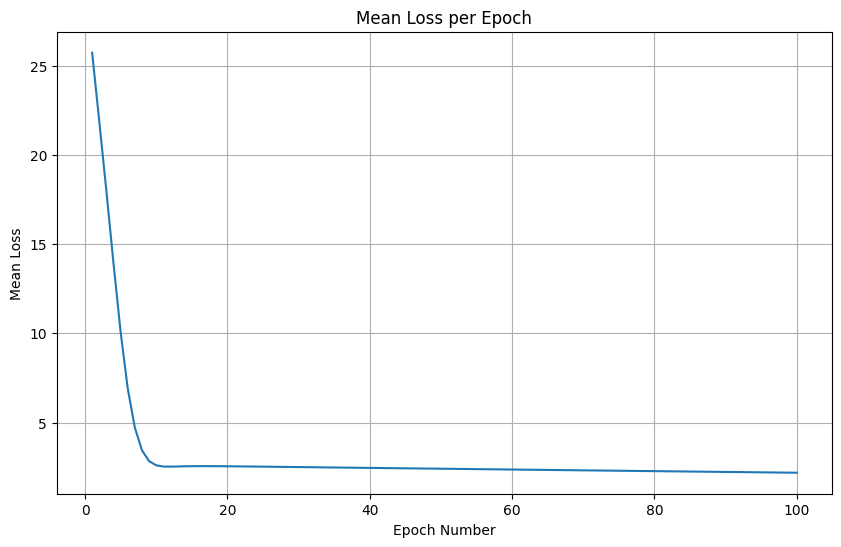

In [465]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), epoch_losses)
plt.xlabel('Epoch Number')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.grid(True)
plt.show()

# Task
Convert the `loss_over_epochs.mp4` video file to a GIF file (e.g., `loss_over_epochs.gif`) using `imageio` and then display the GIF inline in the notebook, removing the original MP4 file afterwards.

## Convert MP4 to GIF

### Subtask:
Read the `loss_over_epochs.mp4` file using `imageio` and then save it as a GIF file (e.g., `loss_over_epochs.gif`) in the current directory. This will allow for inline display in the notebook.


**Reasoning**:
The subtask requires converting the generated MP4 video into a GIF format for inline display in the notebook. I will use `imageio` to read the MP4 frames and then save them as a GIF.



In [466]:
import imageio

# Specify input MP4 and output GIF file paths
input_mp4_path = 'loss_over_epochs.mp4'
output_gif_path = 'loss_over_epochs.gif'

# Read the MP4 file to get a list of frames
frames = imageio.mimread(input_mp4_path)

# Save these frames as a GIF file
imageio.mimsave(output_gif_path, frames, fps=10) # Set fps to 10 for a smooth GIF

print(f"Video converted successfully to GIF: {output_gif_path}")

Video converted successfully to GIF: loss_over_epochs.gif


**Reasoning**:
The subtask requires displaying the newly created GIF inline in the notebook. I will use IPython's `display` and `Image` functions to achieve this.



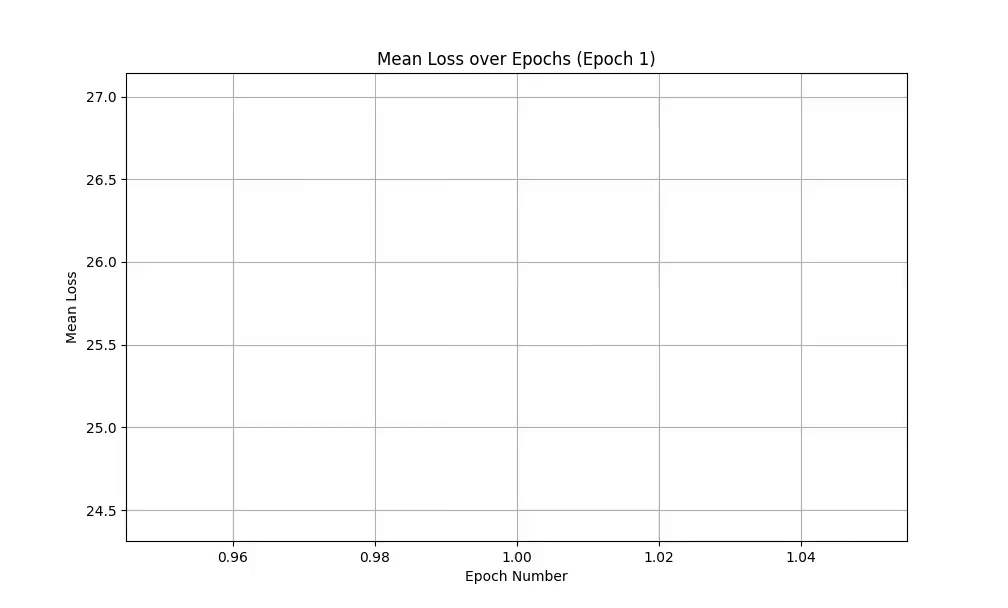

GIF displayed inline from loss_over_epochs.gif


In [469]:
from IPython.display import Image, display

display(Image(filename=output_gif_path))

print(f"GIF displayed inline from {output_gif_path}")

**Reasoning**:
After successfully converting the MP4 to GIF and displaying it, the task requires removing the original MP4 file to clean up the workspace.



In [470]:
import os

os.remove(input_mp4_path)
print(f"Removed original MP4 file: {input_mp4_path}")

FileNotFoundError: [Errno 2] No such file or directory: 'loss_over_epochs.mp4'